<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# About Author

## Project: Fruit Classification Multiclass Problem

### Introduction
👋 Hello, everyone! My name is Arif Miah, and I'm delighted to introduce myself to you. I am a Junior Data Scientist passionate about leveraging data to derive meaningful insights and drive impactful decisions. With a keen interest in exploring the realms of data science, I actively engage in various projects and share my learnings through platforms like Kaggle. 

### About Me
🔍 As a Junior Data Scientist, I immerse myself in the world of data, constantly seeking innovative ways to analyze, interpret, and visualize information to solve real-world problems. My journey in data science is fueled by a curiosity to unravel patterns, discover trends, and uncover hidden insights within complex datasets.

### My Work
📊 I regularly upload my data analysis notebooks and projects on Kaggle, where I showcase my skills in data manipulation, exploratory data analysis (EDA), machine learning, and more. Through these notebooks, I aim to contribute to the data science community by sharing methodologies, code snippets, and insights gained from my projects.

### Passion & Goals
💡 My passion for data science extends beyond technical skills. I am dedicated to continuous learning and improvement, staying updated with the latest advancements in the field. My ultimate goal is to harness the power of data to make a positive impact on society, whether it's through enhancing business strategies, addressing societal challenges, or driving innovation in various domains.

### Let's Connect
🤝 I am always open to collaboration, knowledge sharing, and networking opportunities. Feel free to connect with me on Kaggle or other professional platforms to discuss data science, share ideas, or explore potential collaborations.

</div>


<div style="text-align: center; background-color: #FFC107; color: #000000; padding: 20px; border-radius: 10px;">

# About Dataset

### Dataset link: [Fruit Classification (10 Class)](https://www.kaggle.com/karim-abdulnabi/fruit-classification-10-class)

### Classes Of Dataset
- Apple
- Orange
- Avocado
- Kiwi
- Mango
- Pineapple
- Strawberries
- Banana
- Cherry
- Watermelon

### SOURCES
This data contains a set of images of 10 kinds of fruits, that can be used to make classification using deep learning. The data was scraped from Instagram and Google.

### COLLECTION METHODOLOGY
This data was collected by scraping my code in this repo: [CNN Model Scraping Project](https://github.com/karim-abdulnabi/CNN_model/tree/main/scraping_project). The dataset consists of:
- 230 images for all kinds of fruits for training
- 110 images for testing

### Specifics
- **Model**: MobileNetV2

</div>


<div style="text-align: center; background-color: #2196F3; color: #ffffff; padding: 20px; border-radius: 10px;">

# Import Libraries

## In this section, we import all the necessary libraries that will be used throughout the data analysis and modeling process.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Data Augmentation Parameters

## **train_datagen**

### Description:
`train_datagen` is a preprocessing tool used for augmenting and normalizing the images for the training set. The data augmentation parameters help improve the model's ability to generalize by exposing it to a variety of transformations. Below are the key parameters used for `train_datagen`:

### Parameters:
- **`rescale=1./255`**: Normalizes the pixel values in the training images to be between 0 and 1. This is a common preprocessing step for image data, as neural networks typically perform better with normalized input data.
  
- **`rotation_range=40`**: Randomly rotates the training images within a range of -40° to 40°. This augmentation technique helps the model become more robust to variations in object orientation.

- **`width_shift_range=0.1, height_shift_range=0.1`**: Randomly shifts the training images horizontally and vertically by up to 10% of their width and height. This simulates small changes in camera position or object placement.

- **`horizontal_flip=True`**: Randomly flips the training images horizontally. This augmentation technique helps the model learn to recognize objects regardless of their orientation.

- **`validation_split=0.2`**: Splits the training data into training (80%) and validation (20%) sets. The validation set is used to monitor model performance during training and ao train and validation sets
)


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                             rotation_range=40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.2)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

<div style="text-align: center; background-color: #008CBA; color: #ffffff; padding: 20px; border-radius: 10px;">

# Loading Train and Test Images

## **Train Images**

### Description:
The following code loads the training images using the `train_datagen` configuration. The images are read from the specified directory, which contains subdirectories for each class of fruit (e.g., Apple, Orange, Avocado, etc.). Each class directory contains the respective images for that fruit. This process prepares the images for model training by applying the necessary transformations like normalization and augmentation.

In [4]:
train_ds = train_datagen.flow_from_directory(
    directory = '/kaggle/input/fruit-classification10-class/MY_data/train',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical',
    subset="training",
    seed=123  
)

validation_ds = val_datagen.flow_from_directory(
    directory='/kaggle/input/fruit-classification10-class/MY_data/train',
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
    subset="validation",
    seed=123 
)


test_ds = train_datagen.flow_from_directory(
    directory = '/kaggle/input/fruit-classification10-class/MY_data/test',
    batch_size = 32,
    target_size = (224, 224),
    class_mode='categorical'
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Visualizing The Train Images

## **Overview**

Visualizing the training images helps us understand the data distribution, identify any data quality issues, and get a sense of the kinds of images the model will be learning from. Here, we'll showcase a few examples of the training images using a grid layout. This visualization can provide insights into the image augmentation applied during training, as well as the diversity of the dataset.

### **Code to Visualize Train Images**

The following code loads a batch of images from the training set and visualizes them using Matplotlib. This helps to inspect the transformations like rotations, shifts, and flips applied by the `ImageDataGenerator`.

In [5]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Apple Images

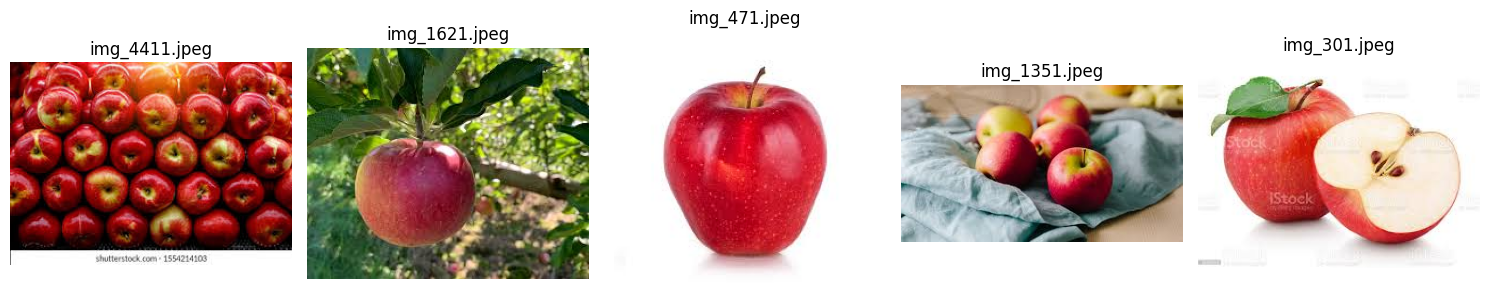

In [6]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/Apple"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Banana Images

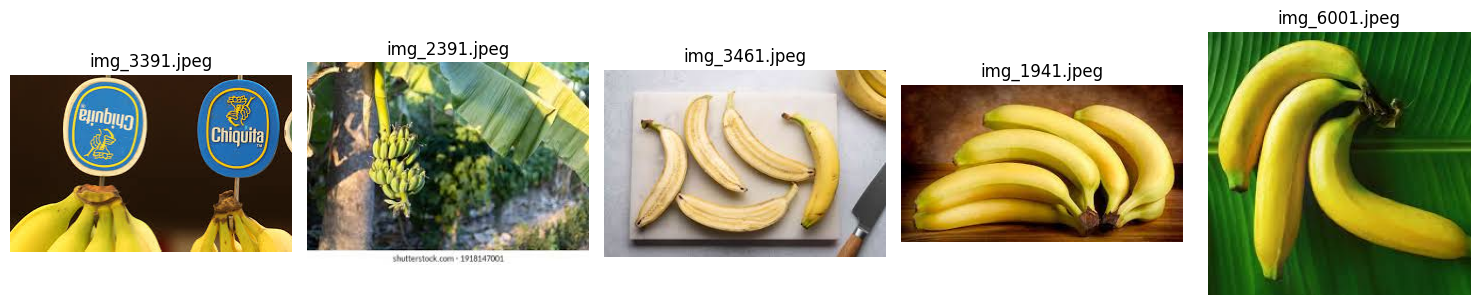

In [7]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/Banana"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Avocado  Images

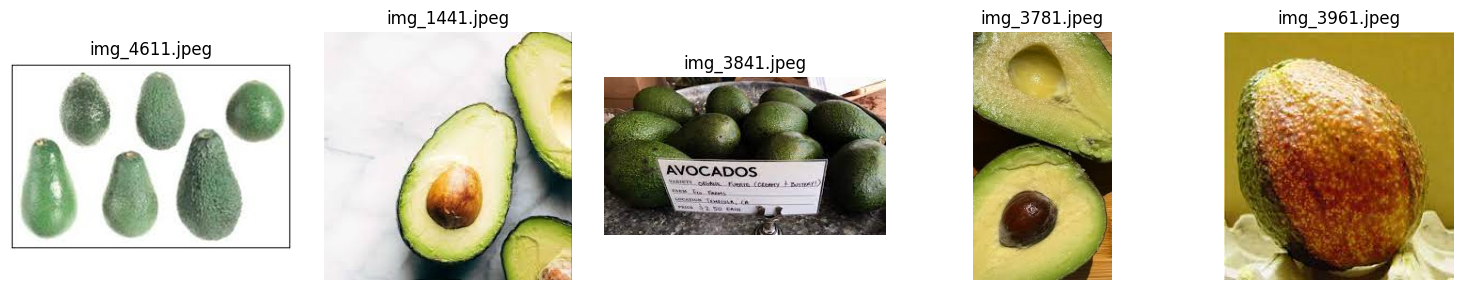

In [8]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/avocado"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Cherry Images

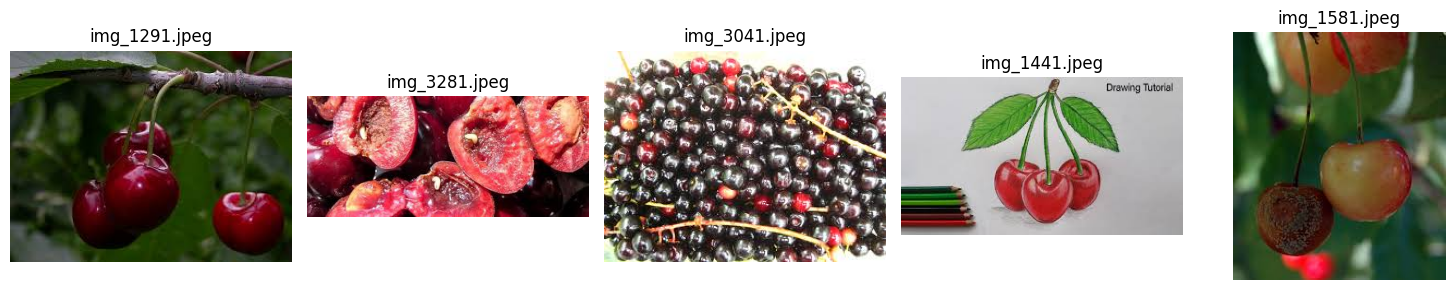

In [9]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/cherry"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Kiwi Image Images

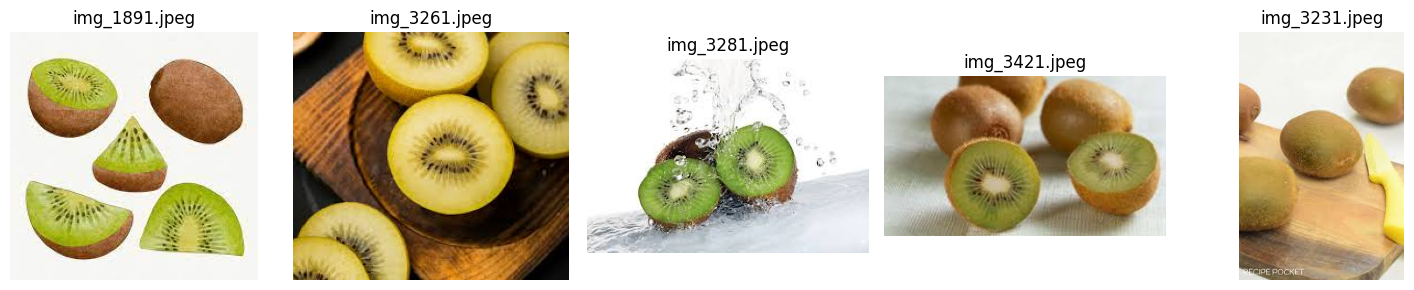

In [10]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/kiwi"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Mango Images

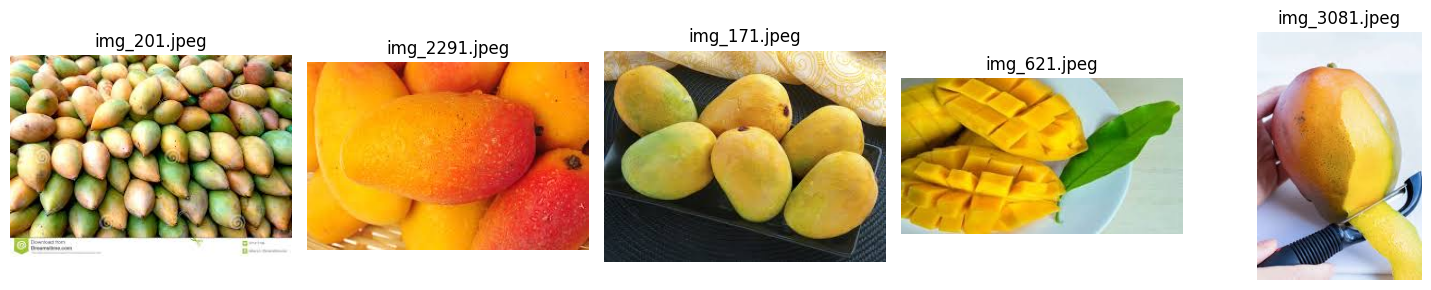

In [11]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/mango"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Orange  Images

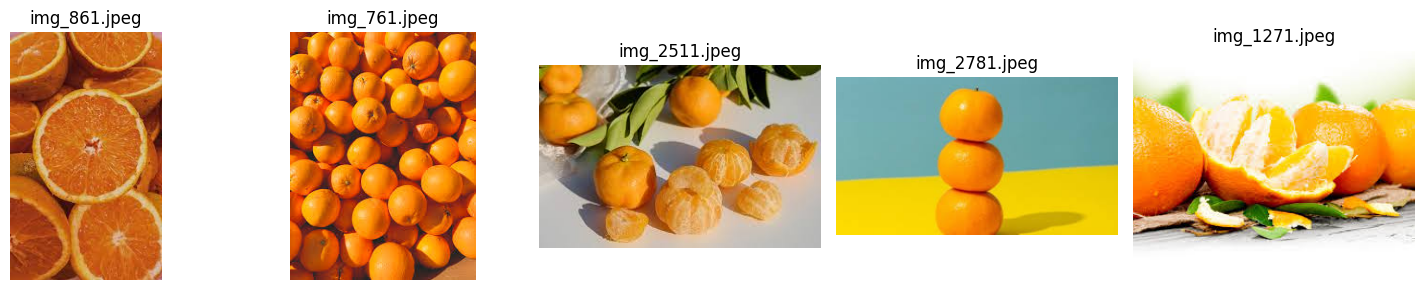

In [12]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/orange"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Pinenapple Images

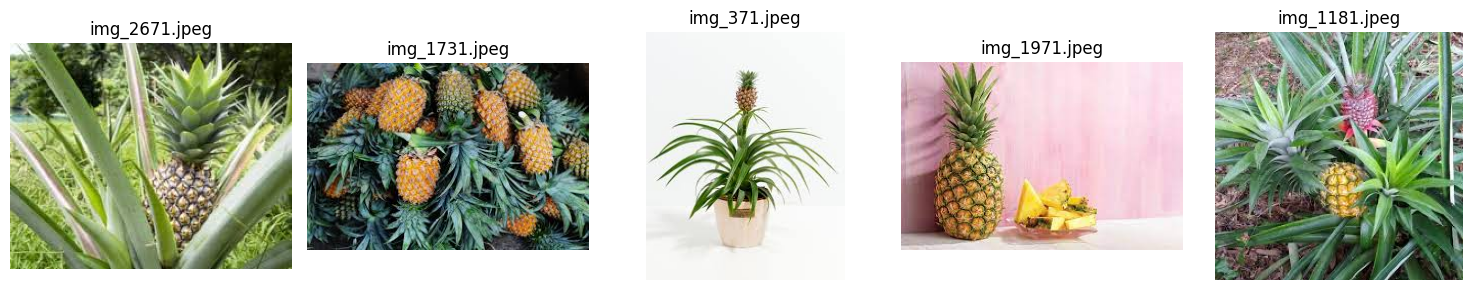

In [13]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/pinenapple"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Strawberries Images

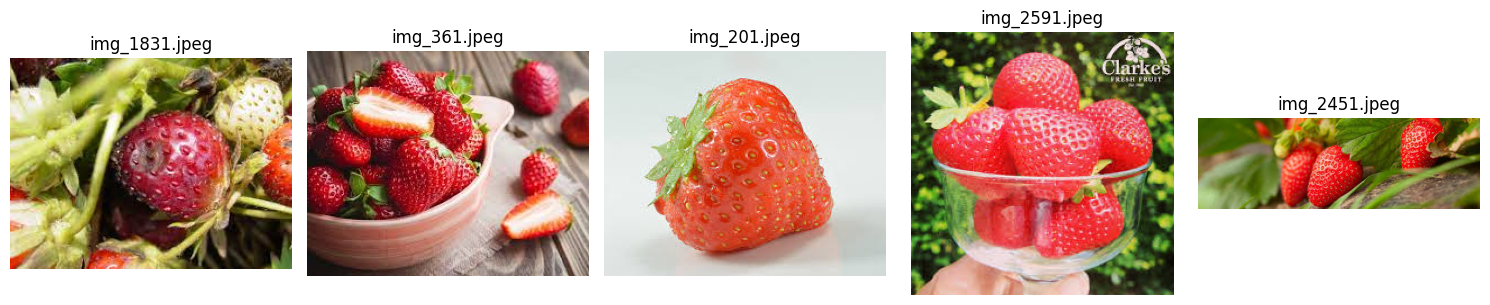

In [14]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/strawberries"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Watermelon Images

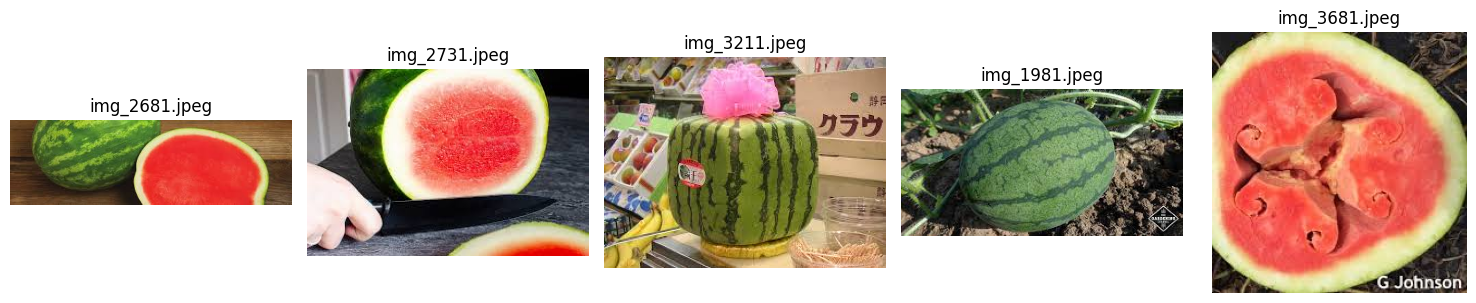

In [15]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/fruit-classification10-class/MY_data/train/watermelon"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Model Building

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Transfer Learning

In [16]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
MobileNetV2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')

# Freeze the pre-trained base model layers
MobileNetV2_base.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(MobileNetV2_base)

# Batch Normalization
model.add(BatchNormalization())

# Dropout Layer
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu')) 

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(60, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Check The Summart Of Model

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Compile The Model

In [20]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='categorical_crossentropy', metrics=['accuracy'])

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Model Training

In [21]:
%%time
# # Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds),
    epochs=100, 
    callbacks=[early_stopping]
)

Epoch 1/100


I0000 00:00:1733744276.610023     113 service.cc:145] XLA service 0x7e68c0012070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733744276.610079     113 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/58 ━━━━━━━━━━━━━━━━━━━━ 13:49 15s/step - accuracy: 0.0312 - loss: 3.1712

I0000 00:00:1733744282.717828     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 600ms/step - accuracy: 0.1587 - loss: 2.5669 - val_accuracy: 0.4935 - val_loss: 1.7393
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4935 - val_loss: 1.7393
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 312ms/step - accuracy: 0.4772 - loss: 1.5742 - val_accuracy: 0.7500 - val_loss: 1.2052
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.2052
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - accuracy: 0.6963 - loss: 1.0680 - val_accuracy: 0.8283 - val_loss: 0.8428
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8283 - val_loss: 0.8428
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.7765 - loss: 0.8289 - val_accuracy: 0.8522 - val_loss: 0.6231
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Plotting The Loss And Accuracy

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9509 - loss: 0.2122


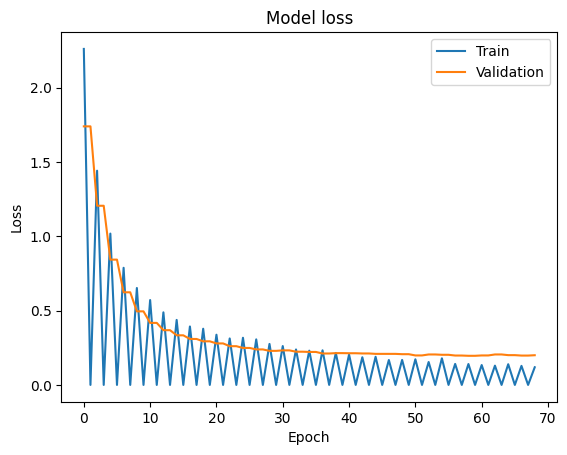

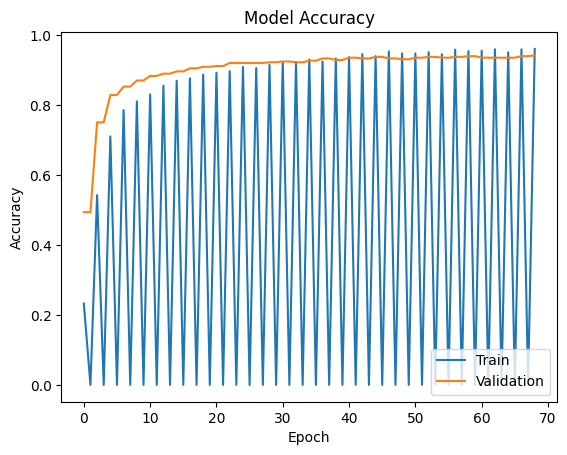

In [22]:
# evaluate the model
loss = model.evaluate(validation_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<div style="text-align: center; background-color: #4CAF50; color: #ffffff; padding: 20px; border-radius: 10px;">

# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


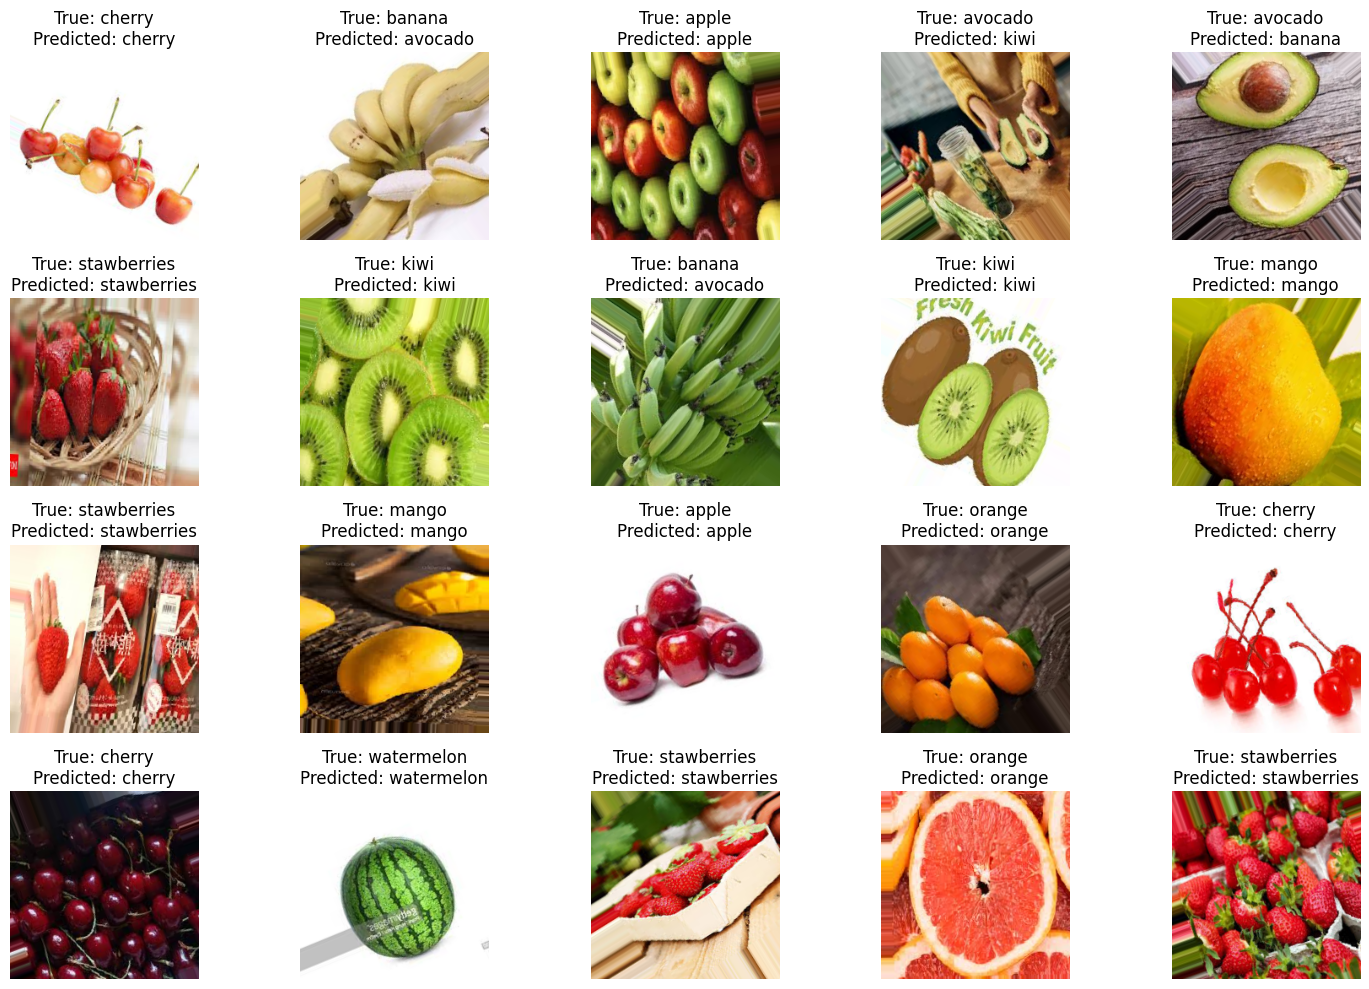

In [23]:
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()